# Importing packages

In [3]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import re
from scipy.stats import chi2_contingency

# Essays

In [4]:
essays = pd.read_csv('../data/essays.csv', sep='|')

In [5]:
def split_sentences(text):
    regex =  r'(?<=[.!?])\s*(?=(?:[^"]*"[^"]*")*[^"]*$)'  # Expressão regular para separar as sentenças

    sentences = re.split(regex, text)

    return sentences[:-1]

### Contando sentenças por parágrafo

In [15]:
#contando a quantidade de sentenças a cada parágrafo
def count_sentences(text):
    v=[]
    vaux=[]
    v = text.split('\n')
    flag = True
    for p in v:
        aux=split_sentences(p)
        for i in aux:
            if i=='.':
                '''
                if flag:
                    print(aux)
                    flag = False
                    '''
                aux.remove(i)
        vaux.append(len(aux))
    return vaux

qtdspf = []

for essay in essays['text']:
    #print(count_sentences(essay))
    qtdspf.append(count_sentences(essay))

qtdspf[1]

[2, 3, 3, 3]

### Contando palavras em um texto

In [16]:

def count_words(text): #recebe a lista de redações divididas em paragrafos
    #retorna wis que é uma lista de listas que representam
    #a quantidade de palavras por sentença em cada paragrafo no texto
    v = text.split('\n')
    all_essays = v.copy()
    wis=[]
    for j in range(len(all_essays)): #Paragrafo
        aux=split_sentences(all_essays[j]).copy() #copia de um paragrafo
        vaux=[]
        for sentence in aux:
            palavras_na_sentenca=0
            words = nltk.word_tokenize(sentence)
            for word in words:
                if word[0].isalpha() != False:
                    palavras_na_sentenca+=1
            vaux.append(palavras_na_sentenca) #quantidade de palavras por sentença    
        wis.append(vaux) #adiciona a quantidade de palavras por sentença nesse paragrafo
        
    return wis

wis = [0]*len(essays['text'])

for i in range(len(essays['text'])):
    wis[i] = count_words(essays['text'][i])
print(wis)

[[[13, 17], [29, 35], [27, 24], [28, 26]], [[30, 44], [25, 16, 45], [30, 23, 33], [16, 25, 63]], [[40, 30], [31, 157, 28], [86]], [[61], [73], [31]], [[41], [33, 39], [20, 20], [31]], [[55], [51, 32], [44, 22], [60]], [[26, 26], [30, 22], [29, 29, 17], [36, 12]], [[15, 22], [13, 10, 31, 23], [17, 17, 13, 41], [18, 34, 22]], [[19, 23], [36, 31], [27, 32], [30, 28, 18]], [[48], [16, 63], [16, 29, 25], [36]], [[19, 13, 13], [41, 23, 17], [23]], [[15, 26, 7, 11], [14, 28, 31], [17, 24, 13], [24, 12]], [[21, 25], [22, 12, 7], [20, 19], [22, 26], [16, 32]], [[17], [25, 14], [30], [23, 18]], [[13, 29], [56], [12, 47], [40]], [[23, 21, 24], [14, 17, 24, 35], [21, 16, 7, 39], [36, 13]], [[26, 24, 10], [34, 57], [8, 47, 21, 30], [31, 32], [31, 43]], [[80], [11, 39], [72, 57], [56]], [[15, 22], [19, 72], [62]], [[8, 16], [23, 16], [23], [33, 40], [8, 15, 38], [31, 14]], [[17, 16], [22, 8], [31], [19]], [[16, 16], [31], [50], [50, 33], [15]], [[50], [27, 26], [], [40, 15, 22], [41]], [[22, 21, 25]

### Somando números da lista de listas (#palavras/paragrafo,/texto e #paragrafos/txt)

In [17]:
#somando todos os numeros da lista de listas
def sum_list(lista):
    aux=[]
    for el in lista:
        aux.append(int(np.array(el)@np.ones(len(el))))
    return aux

'''
transformando todos os vetores de pp em vetores de mesmo tamanho (max_len)
o ultimo elemento de cada vetor é o mesmo ultimo elemento no vetor original
os primeiros len-1 elementos do vetor original permanecerão no mesmo lugar	
todos os outros elementos serão 0
'''
#funçao que adiciona 0 no final de um vetor
def add_zeros(vetor,quantidade):
    vetor_aux = vetor[:-1].copy()
    for i in range(quantidade):
        vetor_aux.append(0)
    vetor_aux.append(vetor[-1])
    return vetor_aux

#somando quantidade de palavras em cada paragrafo
pp=[]
for i in range(len(wis)):
    pp.append(sum_list(wis[i]))

#tomando o maior len de elemento em pp
max_len = 0
for i in range(len(pp)):
    if len(pp[i])>max_len:
        max_len = len(pp[i])

for i in range(len(pp)):
    pp[i] = add_zeros(pp[i],max_len-len(pp[i]))

#somando quantidade de palavras no texto
pt=[]
for i in range(len(wis)):
    pt.append(int(np.array(sum_list(wis[i]))@np.ones(len(wis[i]))))


pft = []
#quantidade de paragrafos no texto
for i in range(len(qtdspf)):
    pft.append(len(qtdspf[i]))

print(max_len,pp[0],len(pt),pft[0])

22 [30, 64, 51, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54] 2164 4


### Contabilizando os periodos longos

In [18]:
#funcao que calcula quantidade de numeros maiores que t em uma lista de listas
def count_greater_than(lista,t):
    aux=0
    for el in lista:
        for i in el:
            if i>t:
                aux+=1
    return aux

pl=[] #quantidade de periodos longos em cada texto
for i in range(len(wis)):
    pl.append(count_greater_than(wis[i],70))
    if pl[i]>3:
        print(i)

print(pl[1209],pl[1301],pl[1889],pl[2156])

#print([ pl.index(el) for el in pl if el>3])

2 3 2 2


### Parágrafos com 1 sentença

In [19]:
ps=[]
for i in range(len(wis)):
    count=0
    for el in wis[i]:
        if len(el)==1:
            count+=1
    ps.append(count)

print(len([el for el in ps if el==0]))

953


### Contabilizando frequencias de palavras

In [20]:
def countdiffwordsbyessay(text):
    all_essays = (text.split('\n')).copy()
    all_essays = [nltk.word_tokenize(essay) for essay in all_essays]
    for i in range(len(all_essays)):
        for word in all_essays[i]:
            if word[0].isalpha() == False:
                all_essays[i].remove(word)
        all_essays[i] = list(np.char.lower(np.array(all_essays[i])))
    aux_essays = all_essays.copy()
    #calculando a quantidade de palavras unicas no texto
    qtdpd = 0
    txt = aux_essays.copy()
    words = [item for sublist in txt for item in sublist]
    #for words in txt:
    fdist1 = nltk.FreqDist(words)

    filtered_word_freq = dict((word, freq) for word, freq in fdist1.items() if not word.isdigit())

    for el in filtered_word_freq.values():
        if el == 1:
            qtdpd+=1
    
    return qtdpd

def countdiffwordsbyparagraph(text):
    all_essays = (text.split('\n')).copy()
    all_essays = [nltk.word_tokenize(essay) for essay in all_essays]
    for i in range(len(all_essays)):
        for word in all_essays[i]:
            if word[0].isalpha() == False:
                all_essays[i].remove(word)
        all_essays[i] = list(np.char.lower(np.array(all_essays[i])))
    aux_essays = all_essays.copy()
    #calculando a quantidade de palavras diferentes no texto
    qtdpd = []
    txt = aux_essays.copy()
    vaux=[]
    for words in txt:
        fdist1 = nltk.FreqDist(words)

        filtered_word_freq = dict((word, freq) for word, freq in fdist1.items() if not word.isdigit())

        vaux.append(filtered_word_freq)
    
    for j in range(len(vaux)):
        count=0
        for i in vaux[j].values():
            if i==1:
                count+=1
        qtdpd.append(count)
    
    return qtdpd

r=[]

for i in range(len(essays['text'])):
    r.append(countdiffwordsbyessay(essays['text'][i]))
print(r[0])

99


### Adicionando as features ao df

In [21]:
essays['palavras_por_texto'] = pt
essays['paragrafos_por_texto'] = pft
essays['palavras_no_paragrafo_1'] = [pp[i][0] for i in range(len(pp))]
essays['palavras_no_ultimo_paragrafo'] = [pp[i][-1] for i in range(len(pp))]
essays['palavras_nos_intermediarios'] = [sum(pp[i][1:-1]) for i in range(len(pp))]
essays['palavras_unicas'] = r
essays['quantidade_de_sentencas_longas'] = pl
essays['quantidade_de_paragrafos_com_sentenca_unica'] = ps

In [22]:
essays#.drop(columns=['palavras_por_paragrafo_1'])

,essay,final_score,text,comp1,comp2,comp3,comp4,comp5,title,url,comments,quantidade_de_sentencas_longas,palavras_por_texto,paragrafos_por_texto,palavras_no_paragrafo_1,palavras_no_ultimo_paragrafo,palavras_nos_intermediarios,palavras_unicas,quantidade_de_paragrafos_com_sentenca_unica
0,0,5.0,"A liberdade de expressão, assim como o direito...",1.0,1.0,1.0,1.0,1.0,Conflito entre liberdade de expressão e intimi...,https://educacao.uol.com.br/bancoderedacoes/re...,<comments>## Comentário geral\r\nTexto regular...,0,199,4,30,54,115,99,0
1,1,6.5,Os direitos fundamentais contidos na Constitui...,1.0,2.0,1.5,1.0,1.0,Entre direitos individuais e escândalos políticos,https://educacao.uol.com.br/bancoderedacoes/re...,<comments>## Comentário geral\r\nTexto regular...,0,350,4,74,104,172,147,0
2,2,2.5,"Ao se falar em liberdade de expressão, é impos...",0.5,0.5,0.5,0.5,0.5,"O freio na liberdade, para uma maior liberdade",https://educacao.uol.com.br/bancoderedacoes/re...,<comments>## Comentário geral\r\nAlém dos muit...,2,372,3,70,86,216,133,1
3,3,2.5,Sabe-se que o cidadão tem direito à privacidad...,1.0,1.0,0.5,0.0,0.0,Privilégio à informação,https://educacao.uol.com.br/bancoderedacoes/re...,<comments>## Comentário geral\r\nO texto começ...,1,165,3,61,31,73,101,3
4,4,5.0,A liberdade de expressão e o direito a vida pr...,1.0,1.0,1.0,1.0,1.0,Limites entre Direitos,https://educacao.uol.com.br/bancoderedacoes/re...,<comments>## Comentário geral\r\nTexto regular...,0,184,4,41,31,112,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,2159,6.5,As salas de bate-papo estão entre as páginas d...,1.5,1.0,1.0,1.5,1.5,Perigo Virtual,http://educacao.uol.com.br/bancoderedacoes/red...,<comments>### Comentário geral\r\nA redação tr...,0,252,4,63,84,105,110,1
2160,2160,5.0,No mundo globalizado em que vivemos a internet...,1.5,1.0,1.0,1.0,0.5,Ter amor próprio antes de qualquer coisa.,http://educacao.uol.com.br/bancoderedacoes/red...,<comments>### Comentário geral\r\nA redação re...,0,314,5,54,87,173,124,0
2161,2161,3.5,Seres humanos têm tentado estabelecer contatos...,1.0,1.0,0.5,1.0,0.0,Uma Fraqueja pela mentira,http://educacao.uol.com.br/bancoderedacoes/red...,<comments>### Comentário geral\r\nNota-se um d...,0,240,3,72,105,63,133,0
2162,2162,6.0,Os relacionamentos na internet parecem express...,1.5,1.5,1.5,1.5,0.0,Em busca da verdade perdida,http://educacao.uol.com.br/bancoderedacoes/red...,<comments>### Comentário geral\r\nA redação de...,0,301,4,56,82,163,156,0


In [23]:
essays.to_csv('essays_do_joao.csv',index=False)

# Threshholds q Malu fez

In [112]:
ths = [v for v in range(60, 100, 5)]

In [113]:

def check_sent(row):
    sentences = split_sentences(row['text'].replace('\n', ''))
    info = {}
    info['essay'] = row['essay']
    sent_lens = []
    for th in ths:
        info[f'{th}'] = 0
    for sent in sentences[:-1]:
        words = nltk.word_tokenize(sent)
        words = [w for w in words if w[0].isalpha()]
        sent_lens.append(len(words))
        for th in ths:
            if len(words) > th:
                info[f'{th}'] += 1
    info['median'] = np.median(sent_lens)
    return info
    
essays_ths = essays.apply(check_sent, axis=1).to_list()

c:\Users\mwuillau\Documents\UFRJ\Correcao-redacoes-ENEM\env\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mwuillau\Documents\UFRJ\Correcao-redacoes-ENEM\env\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [114]:
essays_df = pd.DataFrame(essays_ths)
essays_df = essays_df.merge(essays, on='essay')

<Axes: xlabel='comp1', ylabel='60'>

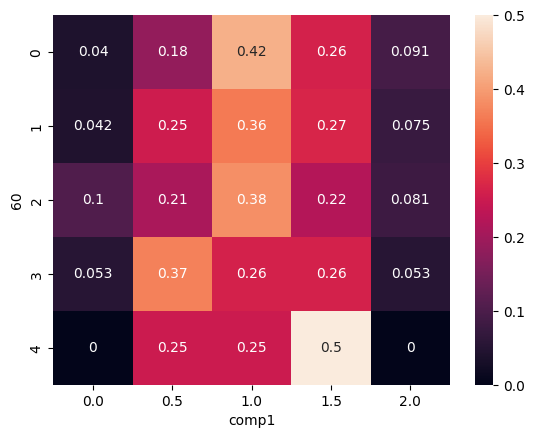

In [128]:
sns.heatmap(pd.crosstab(essays_df['60'], essays_df['comp1'], normalize='index'), annot=True)

In [115]:
for value in ths:
    teste = chi2_contingency(pd.crosstab(essays_df[f'{value}'], essays_df['comp1'])).pvalue
    print(value, teste)

10 1.0201781035513412e-32
15 1.1287023768025923e-38
20 7.823118501684342e-21
25 3.408446300285098e-06
30 0.02677540648516914
35 0.0613651529243639
40 0.9681314682526578
45 0.42980037934332466
50 0.3837127800461792
55 0.2807387041140989
60 0.07099262629375631
65 0.062344095063585875
70 0.000701266254495735
75 0.0024540717721856257
80 0.0007326634097211204
85 0.0023518817473632625
90 0.0014414107742392497
95 0.0068036499810064845
